# Ground Movement Plots over time
@author: Max Felius

In [5]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import os, sys, time
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [29]:
# defining the function for the subsidence
def zg(x,x0,y,y0,R,S):
    return -(S)*np.exp(-np.pi * ((x-x0)**2 + (y-y0)**2)/R**2)

#horizontale displacement
def hdisp(x,x0,y,y0,R,S,H):
    r = np.sqrt(((x-x0)**2 + (y-y0)**2))
    s = (S)*np.exp(-np.pi * ((x-x0)**2 + (y-y0)**2)/R**2)    
    return s*(-(x-x0)/H)

#defining time function
def time_function(t,t0,a,b,mode):
    if t-t0 <= 0:
        return 0
    else:
        if mode == 'linear':
            return -a*(t-t0)
        elif mode == 'poly':
            return -a*(t-t0)**2 - b*(t-t0)
        elif mode == 'exp':
            return -a*np.exp((t-t0))
        elif mode == 'log':
            return -a*np.log(1+b*(t-t0))
        else:
            print('No mode selected')
            return 0

def create_time_function(functiont,x,x_0,R,H,zmax,save_folder):
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    
#     plt.rcParams['font.size'] = 16
    fig, axs = plt.subplots(nrows=1,ncols=4,figsize=(15,5))
#     functiont = zpoly
    fig.subplots_adjust(wspace=0.5)
    axs[3].locator_params(axis="x", nbins=3)
    #calculate maximums for limits on axis
#     zmax = functiont[-1]
    zgmax = -1#min(zg(x,x_0,0,0,R,-zmax))
    hmax = 1#max(hdisp(x,x_0,0,0,R,-zmax,H))
    hmin = min(hdisp(x,x_0,0,0,R,-zmax,H))
    disp_lim = hmax*1.17
    ymax = -zgmax*0.082
    ymin = -zgmax*0.082
    maxsub = zgmax*1.17

    tg = 0
    #vertical displacement/subsidence
    for z in functiont:
        if tg == 0:
            axs[0].plot(x,zg(x,x_0,0,0,R,-z)/-zgmax,c='k',label='Simulated Subsidence')
            axs[0].scatter(23,zg(23,x_0,0,0,R,-z)/-zgmax,c='r')#,label='Simulated PS point')
            axs[0].scatter(24,zg(24,x_0,0,0,R,-z)/-zgmax,c='b')#,label='Simulated PS point')
            axs[0].scatter(20,zg(20,x_0,0,0,R,-z)/-zgmax,c='y')#,label='Simulated PS point')
            axs[0].scatter(17,zg(17,x_0,0,0,R,-z)/-zgmax,c='g')#,label='Simulated PS point')

            axs[2].scatter(t[tg],zg(23,x_0,0,0,R,-z)/-zgmax,c='r')#,label='Simulated PS point')
            axs[2].scatter(t[tg],zg(24,x_0,0,0,R,-z)/-zgmax,c='b')#,label='Simulated PS point')
            axs[2].scatter(t[tg],zg(20,x_0,0,0,R,-z)/-zgmax,c='y')#,label='Simulated PS point')
            axs[2].scatter(t[tg],zg(17,x_0,0,0,R,-z)/-zgmax,c='g')#,label='Simulated PS point')
            axs[2].plot(t[:tg+1],zg(23,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='r')#,label='Simulated PS line')
            axs[2].plot(t[:tg+1],zg(24,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='b')#,label='Simulated PS line')
            axs[2].plot(t[:tg+1],zg(20,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='y')#,label='Simulated PS line')
            axs[2].plot(t[:tg+1],zg(17,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='g')#,label='Simulated PS line')

        else:
            axs[0].plot(x,zg(x,x_0,0,0,R,-z)/-zgmax,c='k')
            axs[0].scatter(23,zg(23,x_0,0,0,R,-z)/-zgmax,c='r')
            axs[0].scatter(24,zg(24,x_0,0,0,R,-z)/-zgmax,c='b')
            axs[0].scatter(20,zg(20,x_0,0,0,R,-z)/-zgmax,c='y')
            axs[0].scatter(17,zg(17,x_0,0,0,R,-z)/-zgmax,c='g')

            axs[2].scatter(t[tg],zg(23,x_0,0,0,R,-z)/-zgmax,c='r')
            axs[2].scatter(t[tg],zg(24,x_0,0,0,R,-z)/-zgmax,c='b')
            axs[2].scatter(t[tg],zg(20,x_0,0,0,R,-z)/-zgmax,c='y')
            axs[2].scatter(t[tg],zg(17,x_0,0,0,R,-z)/-zgmax,c='g')
            axs[2].plot(t[:tg+1],zg(23,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='r')
            axs[2].plot(t[:tg+1],zg(24,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='b')
            axs[2].plot(t[:tg+1],zg(20,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='y')
            axs[2].plot(t[:tg+1],zg(17,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='g')

#         fig.suptitle(f'Simulated Polynomial Sinkhole Subsidence. Influence function: Gaussian. Time step {tg+1}')

        #First figure
        axs[0].set_ylabel('Subsidence [m]')
        axs[0].set_xlabel('Distance East [m]')
        axs[0].set_title('Subsidence')
        axs[0].legend()
        axs[0].grid(True)
#         axs[0].set_ylim([-1.1,0.1])
        axs[0].set_ylim([min(zg(x,x_0,0,0,R,-zmax)),-0.2*min(zg(x,x_0,0,0,R,-zmax))])

        #Third figure
        axs[2].set_ylabel('Subsidence [m]')
        axs[2].set_xlabel('Time [days]')
        axs[2].set_xlim([-1,6])
#         axs[2].set_ylim([-1.1,0.1])
        axs[2].set_ylim([min(zg(x,x_0,0,0,R,-zmax)),-0.1*min(zg(x,x_0,0,0,R,-zmax))])
        axs[2].grid(True)
#         axs[2].legend(loc='lower left')
        axs[2].set_title('Simulated subsidence for PS points')

        #Horizontal displacement
        if tg == 0:
            #first plot should enable the labels
            axs[1].plot(x,hdisp(x,x_0,0,0,R,-z,H)/hmax,c='k',label='Vertical Displacement')
            axs[1].scatter(23,hdisp(23,x_0,0,0,R,-z,H)/hmax,c='r')#,label='Simulated PS point')
            axs[1].scatter(24,hdisp(24,x_0,0,0,R,-z,H)/hmax,c='b')#,label='Simulated PS point')
            axs[1].scatter(20,hdisp(20,x_0,0,0,R,-z,H)/hmax,c='y')#,label='Simulated PS point')
            axs[1].scatter(17,hdisp(17,x_0,0,0,R,-z,H)/hmax,c='g')#,label='Simulated PS point')

            axs[3].scatter(hdisp(23,x_0,0,0,R,-z,H)/hmax,zg(23,x_0,0,0,R,-z)/-zgmax,c='r')#,label='Simulated PS point')
            axs[3].scatter(hdisp(24,x_0,0,0,R,-z,H)/hmax,zg(24,x_0,0,0,R,-z)/-zgmax,c='b')#,label='Simulated PS point')
            axs[3].scatter(hdisp(20,x_0,0,0,R,-z,H)/hmax,zg(20,x_0,0,0,R,-z)/-zgmax,c='y')#,label='Simulated PS point')
            axs[3].scatter(hdisp(17,x_0,0,0,R,-z,H)/hmax,zg(17,x_0,0,0,R,-z)/-zgmax,c='g')#,label='Simulated PS point')
            axs[3].plot(hdisp(23,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(23,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='r')#,label='Simulated PS line')
            axs[3].plot(hdisp(24,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(24,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='b')#,label='Simulated PS line')
            axs[3].plot(hdisp(20,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(20,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='y')#,label='Simulated PS line')
            axs[3].plot(hdisp(17,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(17,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='g')#,label='Simulated PS line')
        else:
            axs[1].plot(x,hdisp(x,x_0,0,0,R,-z,H)/hmax,c='k')
            axs[1].scatter(23,hdisp(23,x_0,0,0,R,-z,H)/hmax,c='r')
            axs[1].scatter(24,hdisp(24,x_0,0,0,R,-z,H)/hmax,c='b')
            axs[1].scatter(20,hdisp(20,x_0,0,0,R,-z,H)/hmax,c='y')
            axs[1].scatter(17,hdisp(17,x_0,0,0,R,-z,H)/hmax,c='g')

            axs[3].scatter(hdisp(23,x_0,0,0,R,-z,H)/hmax,zg(23,x_0,0,0,R,-z)/-zgmax,c='r')
            axs[3].scatter(hdisp(24,x_0,0,0,R,-z,H)/hmax,zg(24,x_0,0,0,R,-z)/-zgmax,c='b')
            axs[3].scatter(hdisp(20,x_0,0,0,R,-z,H)/hmax,zg(20,x_0,0,0,R,-z)/-zgmax,c='y')
            axs[3].scatter(hdisp(17,x_0,0,0,R,-z,H)/hmax,zg(17,x_0,0,0,R,-z)/-zgmax,c='g')
            axs[3].plot(hdisp(23,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(23,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='r')#,label='Simulated PS line')
            axs[3].plot(hdisp(24,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(24,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='b')#,label='Simulated PS line')
            axs[3].plot(hdisp(20,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(20,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='y')#,label='Simulated PS line')
            axs[3].plot(hdisp(17,x_0,0,0,R,-functiont[:tg+1],H)/hmax,zg(17,x_0,0,0,R,-functiont[:tg+1])/-zgmax,c='g')#,label='Simulated PS line')

        #Second Figure
        axs[1].grid(True)
        axs[1].legend()
#         axs[1].set_ylim([-disp_lim,disp_lim])
#         axs[1].set_ylim([-1.1,1.1])
        axs[1].set_ylim([-max(hdisp(x,x_0,0,0,R,-zmax,H))*1.1,max(hdisp(x,x_0,0,0,R,-zmax,H))*1.25])
        axs[1].set_xlabel('Distance East [m]')
        axs[1].set_ylabel('Horizontal Displacement [m]')
        axs[1].set_title('Horizontal Displacement')

        #Fourth Figure
#         axs[3].set_ylim([maxsub*(5/6),ymax])
#         axs[3].set_xlim(0,disp_lim*1.5)
        axs[3].set_xlim(0,max(hdisp(x,x_0,0,0,R,-zmax,H))*1.5)
#         axs[3].set_ylim([-1.1,0])max(hdisp(x,x_0,0,0,R,-zmax,H))
        axs[3].set_ylim([1.1*min(zg(x,x_0,0,0,R,-zmax)),0])
#         axs[3].set_xlim([0,1.1])
        axs[3].grid(True)
        axs[3].set_title('Subsidence vs Displacement')
        axs[3].set_ylabel('Subsidence [m]')
        axs[3].set_xlabel('Horizontal Displacement [m]')
#         axs[3].legend()
        
        legend_elements = [Line2D([0],[0],marker='o',c='r',label='Simulated PS Point'),
                          Line2D([0],[0],marker='o',c='b',label='Simulated PS Point'),
                          Line2D([0],[0],marker='o',c='y',label='Simulated PS Point'),
                          Line2D([0],[0],marker='o',c='g',label='Simulated PS Point')]     
        axs[3].legend(handles=legend_elements,bbox_to_anchor=(1.05, 0.7), loc='upper left');
#         axs[3].set_aspect('equal')#, 'box')
        
#         axs[0].set_aspect('equal')#, 'box')
#         axs[1].set_aspect('equal')#, 'box')
#         axs[2].set_aspect('equal')#, 'box')

        fig.savefig(f'{save_folder}/subs_timestep_extrafig_{tg+1}.png')
        tg += 1
#         break
#     axs[2].legend()
    
    #make legend for last column

#     break
    return axs

Done


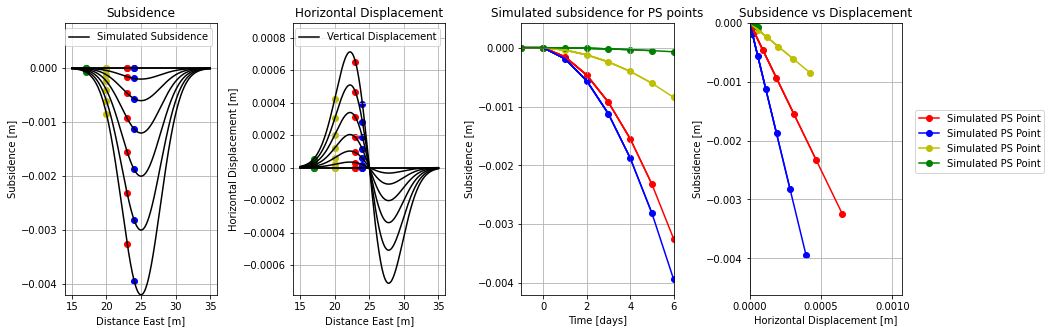

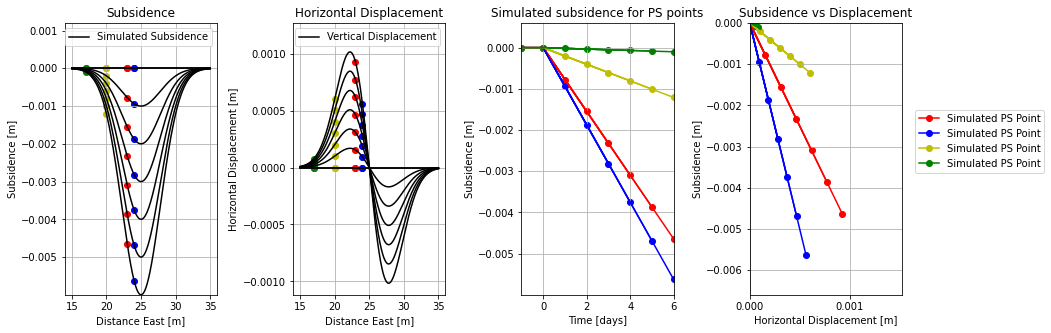

In [30]:
R = 7
H = 10
nx = 1000
x_0 = 25
x_range = 20 # meters (around center)
x = np.linspace(x_0-x_range/2, x_0+x_range/2, nx)
save_folder1 = 'Images_Sinkhole_Poly5'
save_folder2 = 'Images_Sinkhole_Lin5'

n = 8
        
t = np.linspace(-1,6,n)        
t0 = 0
a = 0.0001
b = 0.0001

zl = np.array([time_function(x,t0,10*a,b,'linear') for x in t])
ze = np.array([time_function(x,t0,a,b,'exp') for x in t])
zlog = np.array([time_function(x,t0,a,b,'log') for x in t])
zpoly = np.array([time_function(x,t0,a,b,'poly') for x in t])

fig_out = create_time_function(zpoly,x,x_0,R,H,zpoly[-1],save_folder1)
fig_out = create_time_function(zl,x,x_0,R,H,zl[-1],save_folder2)

print('Done')